In [106]:

import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [107]:
img = cv2.imread('test_images/mahela.jpeg')
img.shape


(416, 392, 3)

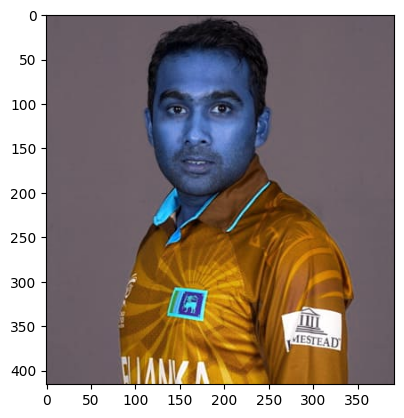

In [108]:
plt.imshow(img
          )

In [109]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [110]:
gray.shape

(416, 392)

In [111]:
gray

array([[100,  99,  98, ...,  96,  98, 100],
       [100,  99,  98, ...,  96,  98, 100],
       [100,  99,  98, ...,  96,  98, 100],
       ...,
       [ 97,  95,  93, ...,  93,  95,  97],
       [ 97,  95,  93, ...,  93,  95,  97],
       [ 97,  95,  93, ...,  93,  95,  97]], dtype=uint8)

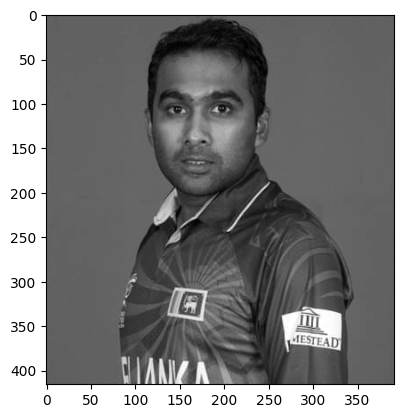

In [112]:
plt.imshow(gray,cmap="gray")

In [113]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[102,  53, 138, 138]], dtype=int32)

In [114]:
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [115]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [116]:
faces


array([[102,  53, 138, 138]], dtype=int32)

In [117]:
( x,y,w,h ) = faces[0]
x,y,w,h

(np.int32(102), np.int32(53), np.int32(138), np.int32(138))

In [118]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)


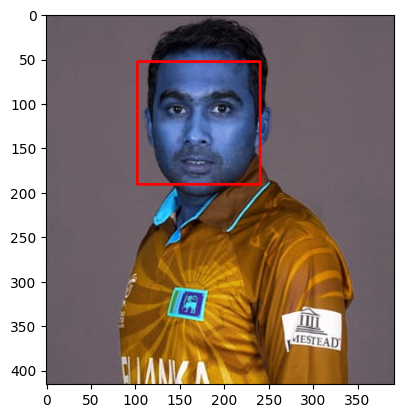

In [119]:
plt.imshow(face_img)

In [120]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    row_of_images_gray=gray[y:y+h,x:x+w]
    row_of_images_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(row_of_images_gray)
    for (ex,ey,ew,eh) in eyes:
          cv2.rectangle(row_of_images_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
            
        

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

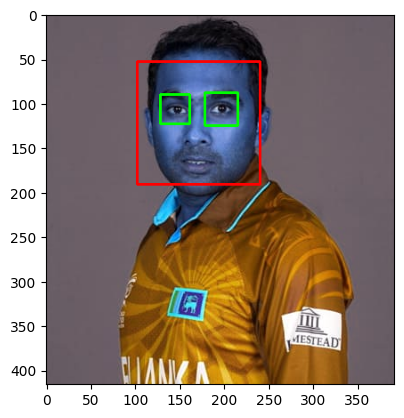

In [121]:
plt.imshow(face_img, cmap='gray')


In [122]:
plt.show()

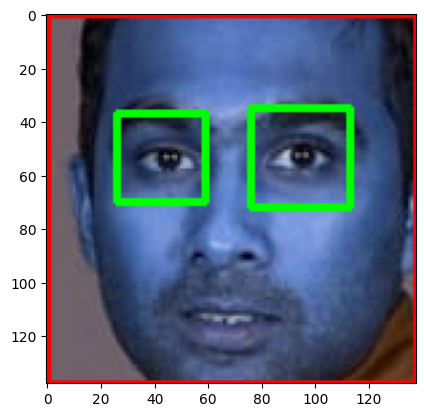

In [123]:
%matplotlib inline
plt.imshow(row_of_images_color, cmap='gray')

In [124]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not found or unable to read: {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        row_of_images_gray = gray[y:y+h, x:x+w]
        row_of_images_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(row_of_images_gray)
        if len(eyes) >= 2:
            return  row_of_images_color
    return None


In [125]:
import cv2
import matplotlib 
from matplotlib import pyplot as plt
original_image = cv2.imread('./test_images/mahela.jpeg')


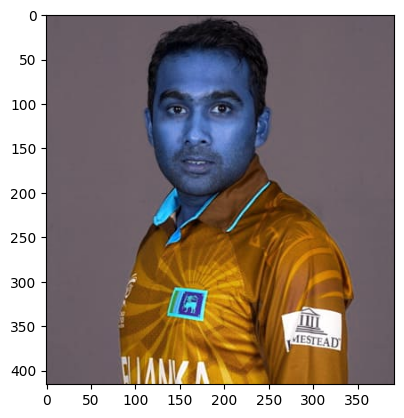

In [126]:
plt.imshow(original_image)

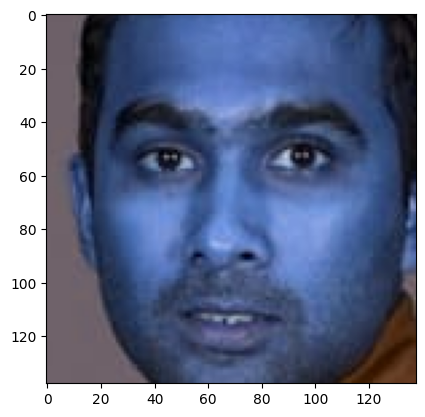

In [127]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/mahela.jpeg')
plt.imshow(cropped_image)

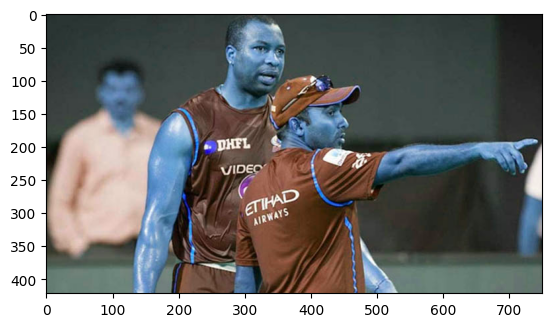

In [128]:
org_image_obstructed = cv2.imread('./test_images/mahela2.jpg')
plt.imshow(org_image_obstructed)

In [129]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/mahela2.jpg')
cropped_image_no_2_eyes

array([[[ 50,  64,  62],
        [ 48,  62,  60],
        [ 47,  61,  59],
        ...,
        [ 58,  69,  67],
        [ 58,  69,  67],
        [ 58,  69,  67]],

       [[ 49,  63,  61],
        [ 45,  59,  57],
        [ 43,  57,  55],
        ...,
        [ 58,  69,  67],
        [ 58,  69,  67],
        [ 58,  69,  67]],

       [[ 48,  62,  60],
        [ 44,  58,  56],
        [ 41,  55,  53],
        ...,
        [ 58,  69,  67],
        [ 58,  69,  67],
        [ 58,  69,  67]],

       ...,

       [[119, 164, 202],
        [114, 158, 199],
        [109, 155, 196],
        ...,
        [153,  98,  67],
        [156,  99,  67],
        [162, 104,  69]],

       [[118, 163, 201],
        [114, 158, 199],
        [108, 154, 195],
        ...,
        [151, 100,  60],
        [155, 100,  61],
        [165, 104,  64]],

       [[118, 163, 201],
        [113, 157, 198],
        [108, 154, 195],
        ...,
        [152, 104,  56],
        [156, 101,  56],
        [161, 100,  56]]

In [130]:
path_to_data = "./data_set/"
path_to_cropped_data = "./data_set/cropped/"

In [131]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [132]:
img_dirs


['./data_set/cropped',
 './data_set/kumara_sangakara',
 './data_set/mahela_jayawardene',
 './data_set/nuwan kulasekara',
 './data_set/sanath jayasuriya',
 './data_set/tillakaratne_dilshan']

In [133]:
import shutil
if os.path.exists(path_to_cropped_data):
     shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [135]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        row_of_images_color = get_cropped_image_if_2_eyes(entry.path)
        if row_of_images_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, row_of_images_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
Image not found or unable to read: ./data_set/cropped\kumara_sangakara
Image not found or unable to read: ./data_set/cropped\mahela_jayawardene
Image not found or unable to read: ./data_set/cropped\nuwan kulasekara
Image not found or unable to read: ./data_set/cropped\sanath jayasuriya
Image not found or unable to read: ./data_set/cropped\tillakaratne_dilshan
kumara_sangakara
Image not found or unable to read: ./data_set/kumara_sangakara\pageInfo.txt
Image not found or unable to read: ./data_set/kumara_sangakara\ScreenHunter_08_Dec._09_22.41.gif
mahela_jayawardene
nuwan kulasekara
Image not found or unable to read: ./data_set/nuwan kulasekara\pageInfo.txt
sanath jayasuriya
Image not found or unable to read: ./data_set/sanath jayasuriya\pageInfo.txt
Image not found or unable to read: ./data_set/sanath jayasuriya\Sanath-Jayasuriya-attacks-©-AFP.jpg
tillakaratne_dilshan
